<a href="https://colab.research.google.com/github/BKV15/AI_Utech/blob/main/Machine%20Learning/Project%202%20-%20Churn%20modeling/Project_2_Churn_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Churn Modeling

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png">

## 0 - Preparation

## ` Download Dataset`

In [ ]:
!wget https://raw.githubusercontent.com/BKV15/AI_Utech/main/Machine%20Learning/Project%202%20-%20Churn%20modelling/Churn.csv

## ` Importing Libraries`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split , cross_validate , GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
import warnings

## `Notebook settings`

In [3]:
sns.set_theme(style='darkgrid')
warnings.filterwarnings('ignore')

## ` Loading Dataset`

In [4]:
dataset = pd.read_csv('Churn.csv')
dataset.sample()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4384,4385,15715796,Romani,728,France,Male,37,0,0.0,2,1,1,72203.8,0


## 1 - Introduction and Data Cleaning

Since this data set is very clean and have no null value, no cleaning actually is required. Only dropping columns that have no value in visualization and training. Also binary columns are changed to `Yes` or `No` for better visualization. We change them back into binary in the data preprocessing phase just before training machine learning models.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
churn_data = dataset.drop(['RowNumber' , 'CustomerId' , 'Surname'] , axis = 1)
churn_data['HasCrCard'] = churn_data['HasCrCard'].map({0 : 'No' , 1 : 'Yes'})
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].map({0 : 'No' , 1 : 'Yes'})
churn_data['Exited'] = churn_data['Exited'].map({0 : 'No' , 1 : 'Yes'})

In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


## EDA and Visualization

A lot of questions can be answered about why people leave a business by looking at this dataset. Questions like :
* `People in which country are more likely to exit ?`
* `Which gender is more likely to exit ?`
* `What is the mean salary of people who exited ?`
<br>
Also we can find out information unrelated to people exiting or not like :
* `Which country has higher mean salary?`
* `Which gender gets paid more`


* `Data seems to be imbalaned since the ratio of people who exited to those that didn't is 1/4`
* ` France also has higher count than other two countris`

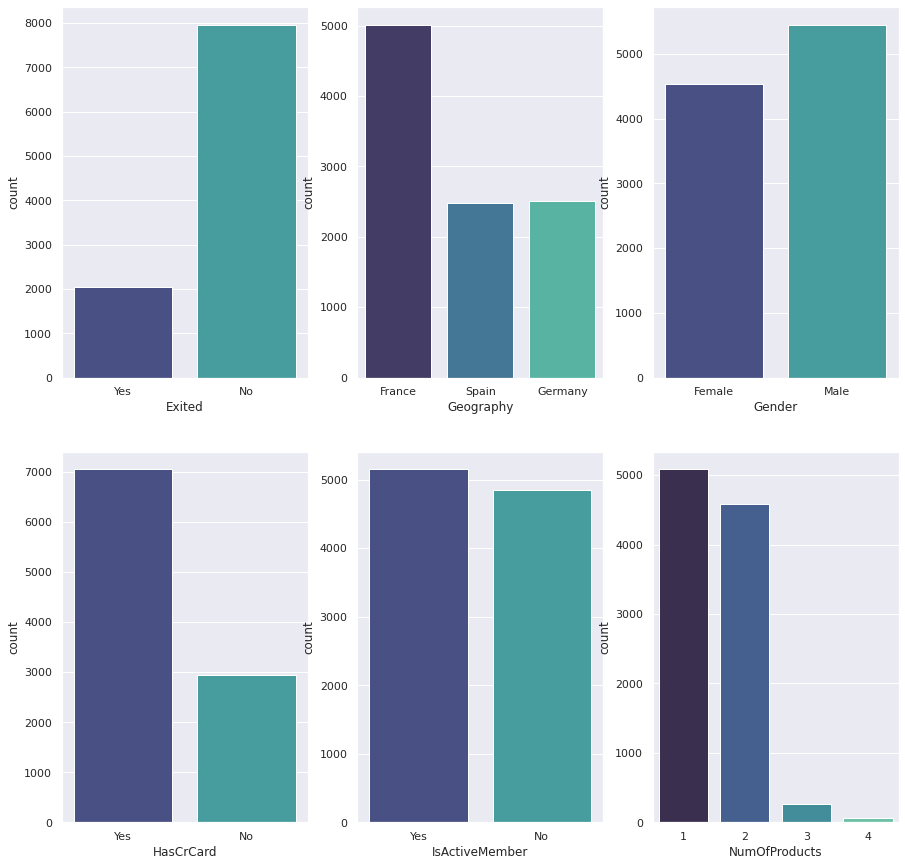

In [8]:
fig , ax = plt.subplots(2,3,figsize=(15,15))
sns.countplot(data = churn_data , x='Exited' , palette='mako' , ax=ax[0,0])
sns.countplot(data = churn_data , x='Geography' , palette='mako' , ax=ax[0,1])
sns.countplot(data = churn_data , x='Gender' , palette='mako' , ax=ax[0,2])
sns.countplot(data = churn_data , x='HasCrCard' , palette='mako' , ax=ax[1,0])
sns.countplot(data = churn_data , x='IsActiveMember' , palette='mako' , ax=ax[1,1])
sns.countplot(data = churn_data , x='NumOfProducts' , palette='mako' , ax=ax[1,2])

* `Germany has a higher Age mean than others which mean that it has an older population`
* ` Germans also are more likely to deposit their money and have a higher balance than others`
* ` Estimated salary across both gender is equal`

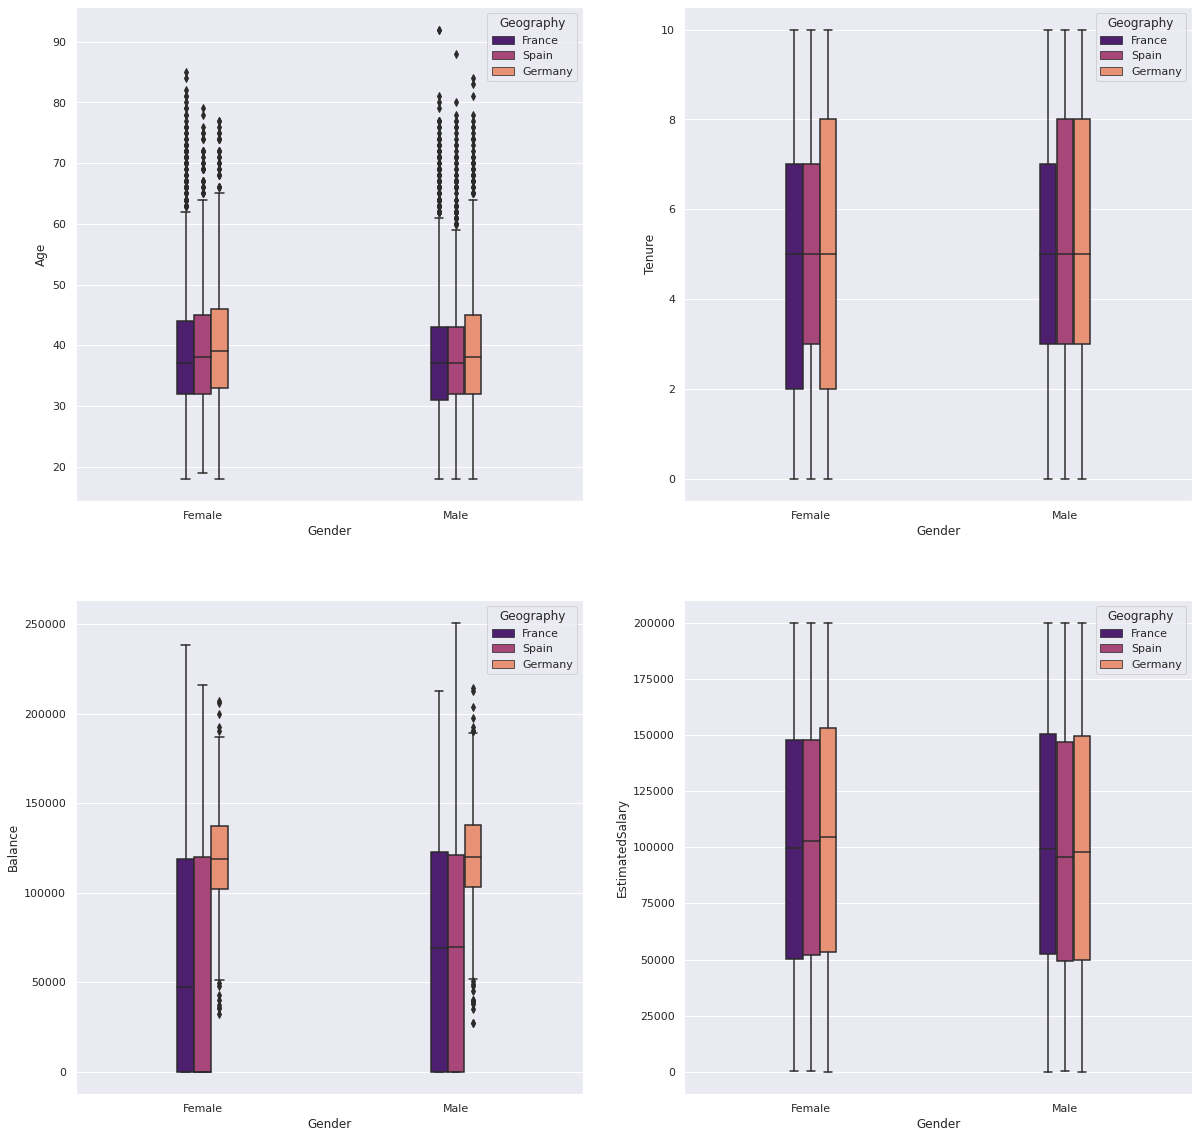

In [9]:
fig , ax = plt.subplots(2,2,figsize=(20,20))
sns.boxplot(data = churn_data , x='Gender' , y='Age' , palette='magma' , hue='Geography', ax=ax[0,0] , width=0.2)
sns.boxplot(data = churn_data , x='Gender' , y='Tenure' , palette='magma' , hue='Geography', ax=ax[0,1] , width=0.2)
sns.boxplot(data = churn_data , x='Gender' , y='Balance' , palette='magma' , hue='Geography', ax=ax[1,0] , width=0.2)
sns.boxplot(data = churn_data , x='Gender' , y='EstimatedSalary' , palette='magma' , hue='Geography', ax=ax[1,1] , width=0.2)

* ` Women exited this business slightly more than men`
* ` Spanish people are less likely to leave this business than other people`

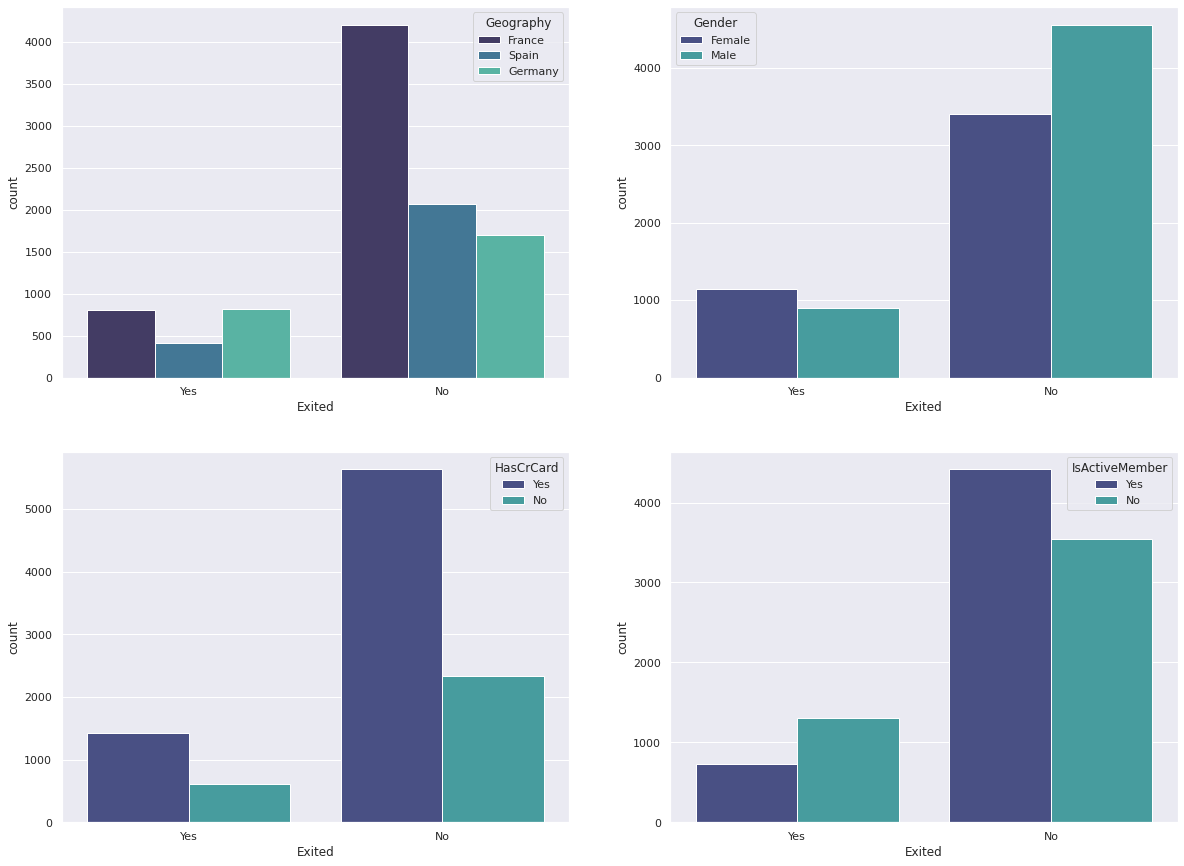

In [10]:
fig , ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(data = churn_data , x='Exited' , hue='Geography' , palette='mako' , ax=ax[0,0])
sns.countplot(data = churn_data , x='Exited' , hue='Gender' , palette='mako' , ax=ax[0,1])
sns.countplot(data = churn_data , x='Exited' , hue='HasCrCard' , palette='mako' , ax=ax[1,0])
sns.countplot(data = churn_data , x='Exited' , hue='IsActiveMember' , palette='mako' , ax=ax[1,1])

* ` Older people regardless of gender and nationality are more likely to leave this buisiness as it seems`

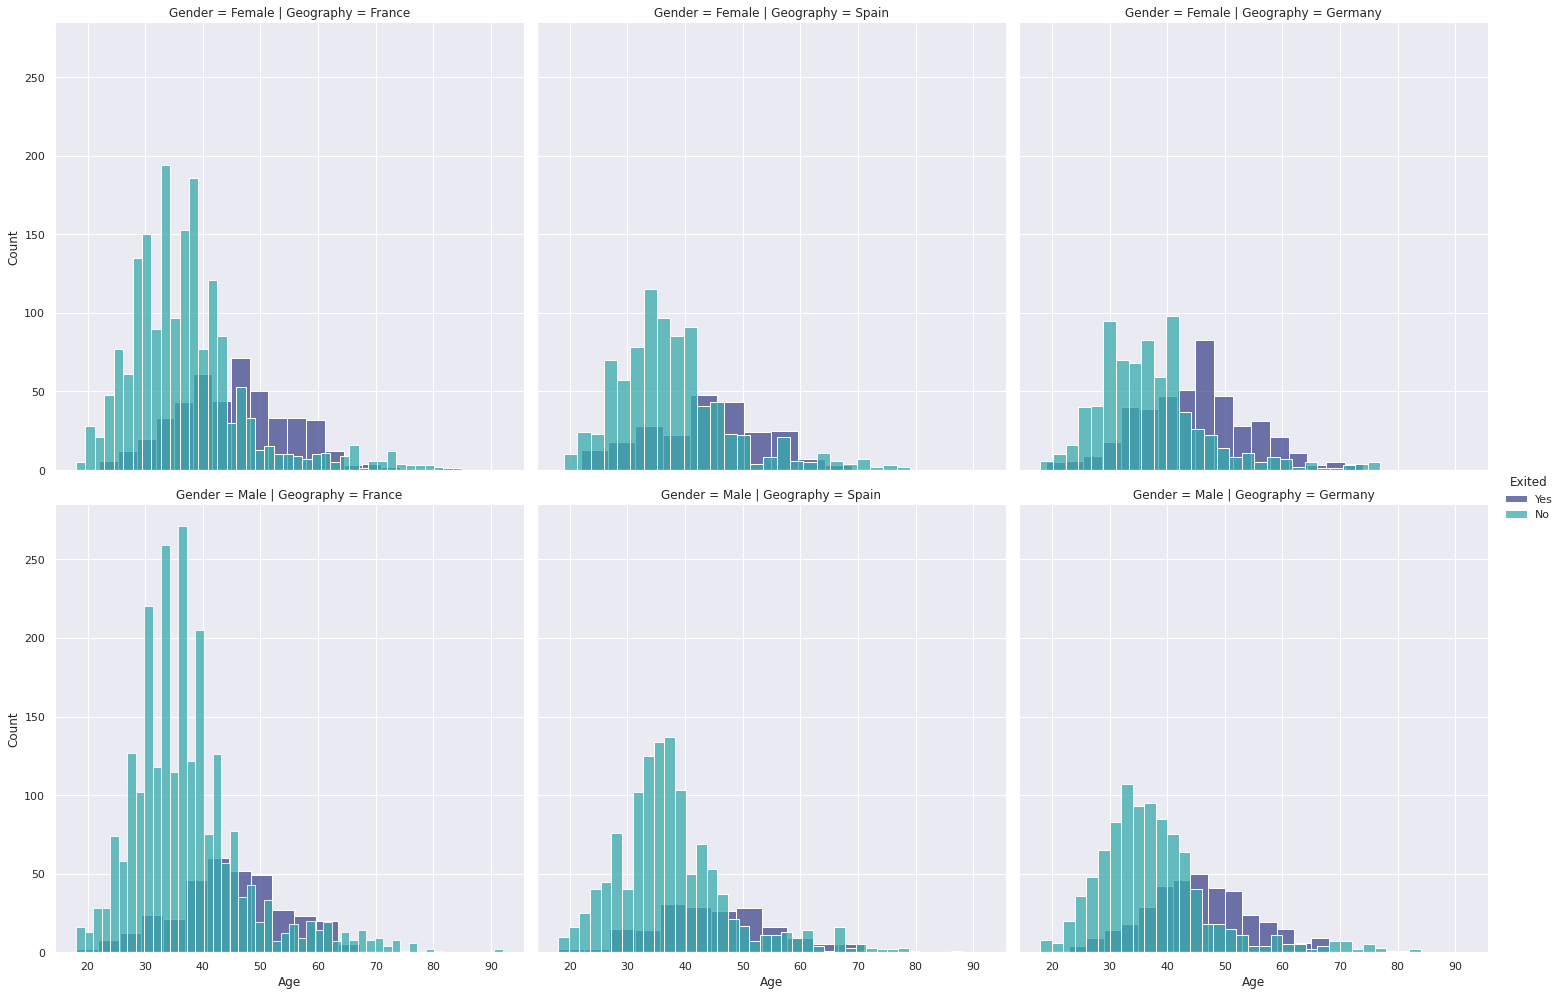

In [11]:
g = sns.FacetGrid(data=churn_data , row='Gender' , col='Geography' , hue='Exited' , height=7 , palette='mako')
g.map_dataframe(sns.histplot , 'Age')
g.add_legend()

* ` Age is the most prominent factor in people choosing to stay or leave this buisiness`

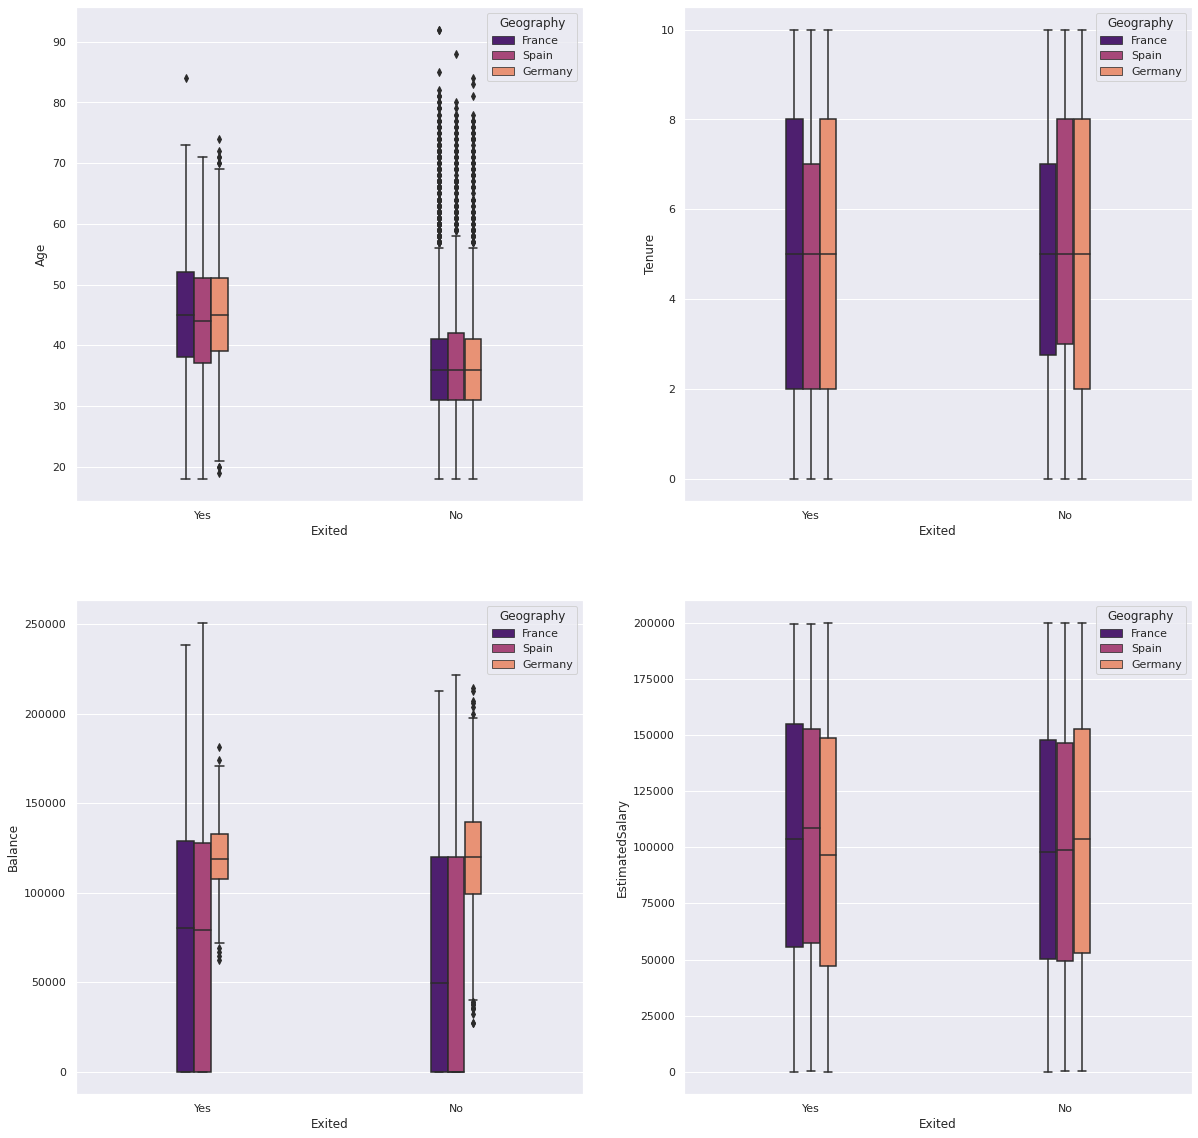

In [12]:
fig , ax = plt.subplots(2,2,figsize=(20,20))
sns.boxplot(data = churn_data , x='Exited' , y='Age' , palette='magma' , hue='Geography', ax=ax[0,0] , width=0.2)
sns.boxplot(data = churn_data , x='Exited' , y='Tenure' , palette='magma' , hue='Geography', ax=ax[0,1] , width=0.2)
sns.boxplot(data = churn_data , x='Exited' , y='Balance' , palette='magma' , hue='Geography', ax=ax[1,0] , width=0.2)
sns.boxplot(data = churn_data , x='Exited' , y='EstimatedSalary' , palette='magma' , hue='Geography', ax=ax[1,1] , width=0.2)

## 3 - Machine Learning

This dataset is just a simple classification problem. We only need to encode binary and categorical labels, standardize countinus values and finally split dataset into train and test. Then using cross validation we can choose wich models are better for this problem.

## ` Data Preprocessing`

In [13]:
churn_data['HasCrCard'] = churn_data['HasCrCard'].map({'No' : 0 , 'Yes' : 1})
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].map({'No' : 0 , 'Yes' : 1})
churn_data['Exited'] = churn_data['Exited'].map({'No' : 0 , 'Yes' : 1})
churn_data['Gender'] = churn_data['Gender'].map({'Female' : 0 , 'Male' : 1})

In [14]:
X = churn_data.iloc[: , :-1].values
y = churn_data.iloc[: , -1].values

In [15]:
ct = ColumnTransformer(transformers=[('encoder' , OneHotEncoder() , [1])] , remainder='passthrough')
X = ct.fit_transform(X)

## `Feature Selection`

As can be seen here and just like we previously discussed `Geography`, `Gender`, `Age`, `Balance` and `IsActiveMember` are the most realted features to target. So we need to reassign `X` so that it only include these features.

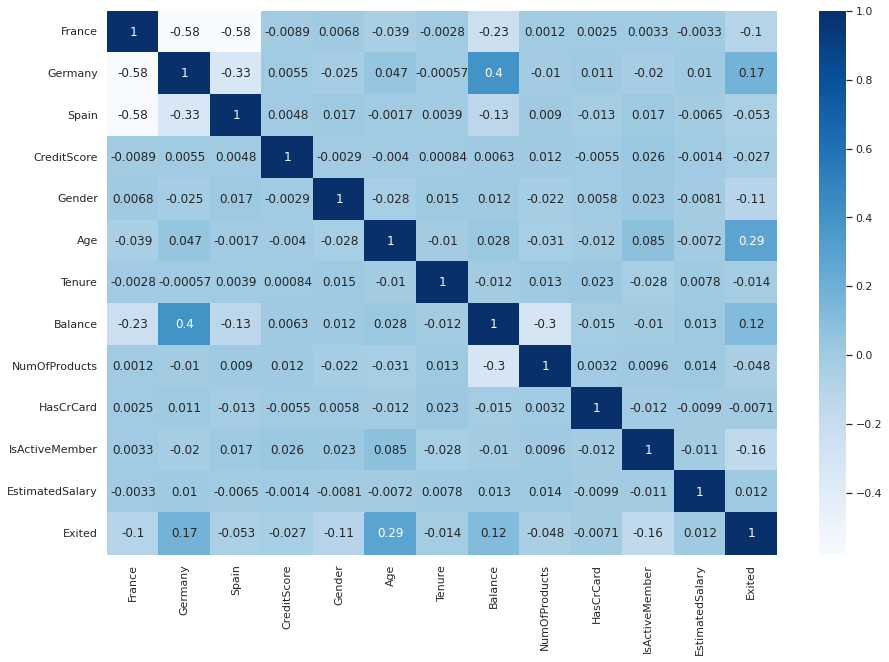

In [16]:
col_name = ['France' , 'Germany' , 'Spain' , 'CreditScore' , 'Gender' , 'Age' ,
            'Tenure' , 'Balance' , 'NumOfProducts' , 'HasCrCard' , 'IsActiveMember' , 'EstimatedSalary']

plt.figure(figsize=(15,10))

corr = pd.DataFrame(X , columns=col_name)
corr = pd.concat([corr , pd.Series(y , name='Exited')] , axis=1)

for name in col_name:
    corr[name] = corr[name].astype('float')

corr = corr.corr()
sns.heatmap(corr , annot=True , cmap='Blues')

In [17]:
X = X[: , [0,1,2,4,5,7,10]]

## ` Splitting dataset into train and test`

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (8000, 7)
y_train : (8000,)
X_test : (2000, 7)
y_test : (2000,)


## `Standardization`

In [19]:
sc = StandardScaler()
X_train[: , 4:6] =  sc.fit_transform(X_train[: , 4:6])
X_test[: , 4:6] =  sc.transform(X_test[: , 4:6])

## ` Choosing the best model`

Now that our data is ready for training we need to find the best model. Using corss validation we evaluate different classifier based on `Accuracy` and `F1_score` and choses models that have the best.

### `Scores`

In [20]:
scoring = ['accuracy' , 'f1' , 'precision' , 'recall']

### `Models`

In [21]:
classifiers = []
names = ['lrc' , 'knn' , 'dtc' , 'rfc' , 'xgbc' , 'svc']

## Logistic Regression Classifier
lrc = LogisticRegression()
classifiers.append(lrc)

## K Nearest Neighbor Classifier
knn = KNeighborsClassifier()
classifiers.append(knn)

## Decision Tree Classifier
dtc = DecisionTreeClassifier()
classifiers.append(dtc)

## Random Forest Classifier
rfc = RandomForestClassifier()
classifiers.append(rfc)

## XGBoost Classifier
xgbc = xgb.XGBClassifier(n_jobs=-1)
classifiers.append(xgbc)

## Support Vector Classifier
svc = SVC()      
classifiers.append(svc)

### ` Cross validation and visualizing result`

Based on our metrics we chose `KNeighbors`, `XGBoost` and `Support Vector` for further training.

In [22]:
model_evaluation = []

for model , name in zip(classifiers , names):
    
    temp_list = []
    temp_list.append(name)

    scores = cross_validate(
        estimator = model,
        X = X_train,
        y = y_train,
        cv = 10,
        scoring = scoring
    )

    temp_list.append(scores['test_accuracy'].mean())
    temp_list.append(scores['test_f1'].mean())
    temp_list.append(scores['test_precision'].mean())
    temp_list.append(scores['test_recall'].mean())


    model_evaluation.append(temp_list)

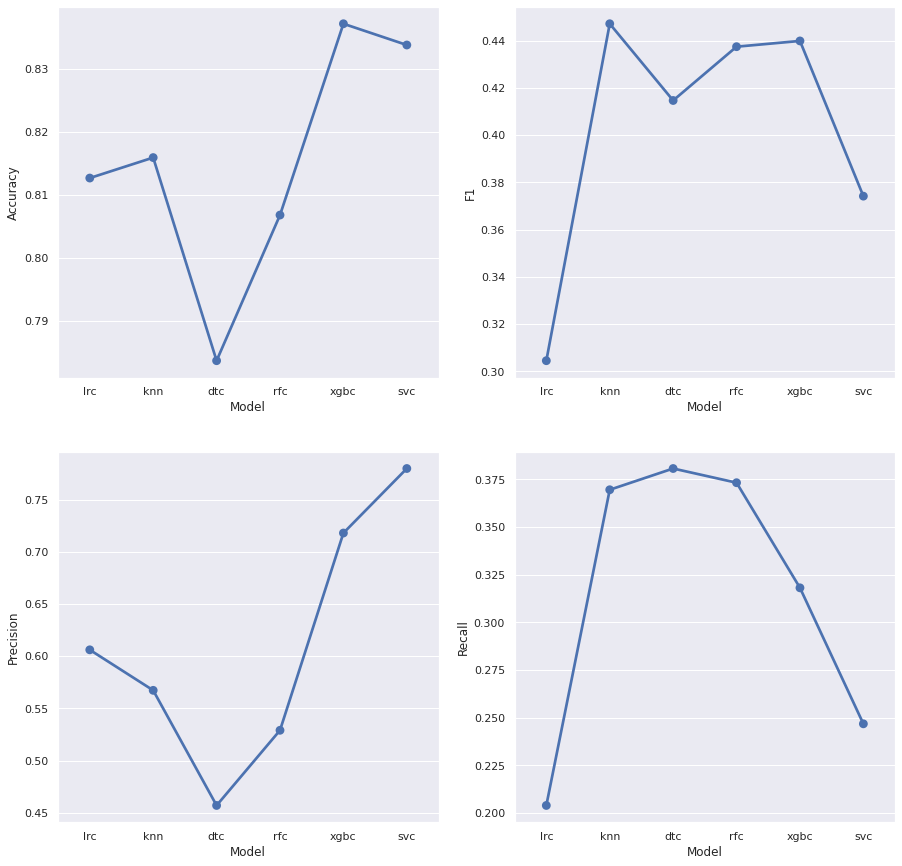

In [23]:
fig , ax = plt.subplots(2,2,figsize=(15,15))

model_evaluation = pd.DataFrame(model_evaluation , columns=['Model' , 'Accuracy' , 'F1' , 'Precision' , 'Recall'])

sns.pointplot(data=model_evaluation , x='Model' , y='Accuracy' , ax=ax[0,0])
sns.pointplot(data=model_evaluation , x='Model' , y='F1' , ax=ax[0,1])
sns.pointplot(data=model_evaluation , x='Model' , y='Precision' , ax=ax[1,0])
sns.pointplot(data=model_evaluation , x='Model' , y='Recall' , ax=ax[1,1])

## ` K Neighbors Classification`

In [24]:
knn = KNeighborsClassifier()

params = [{'n_neighbors' : [3,5,7,9,11]}]

grid_knn = GridSearchCV(estimator=knn , param_grid=params , scoring='accuracy' , cv=10 , n_jobs=-1)
grid_knn.fit(X_train , y_train)

print(f'Best_score : {grid_knn.best_score_}')
print(f'Best_parameter : {grid_knn.best_params_}')

Best_score : 0.8274999999999999
Best_parameter : {'n_neighbors': 11}


### `Evaluation`

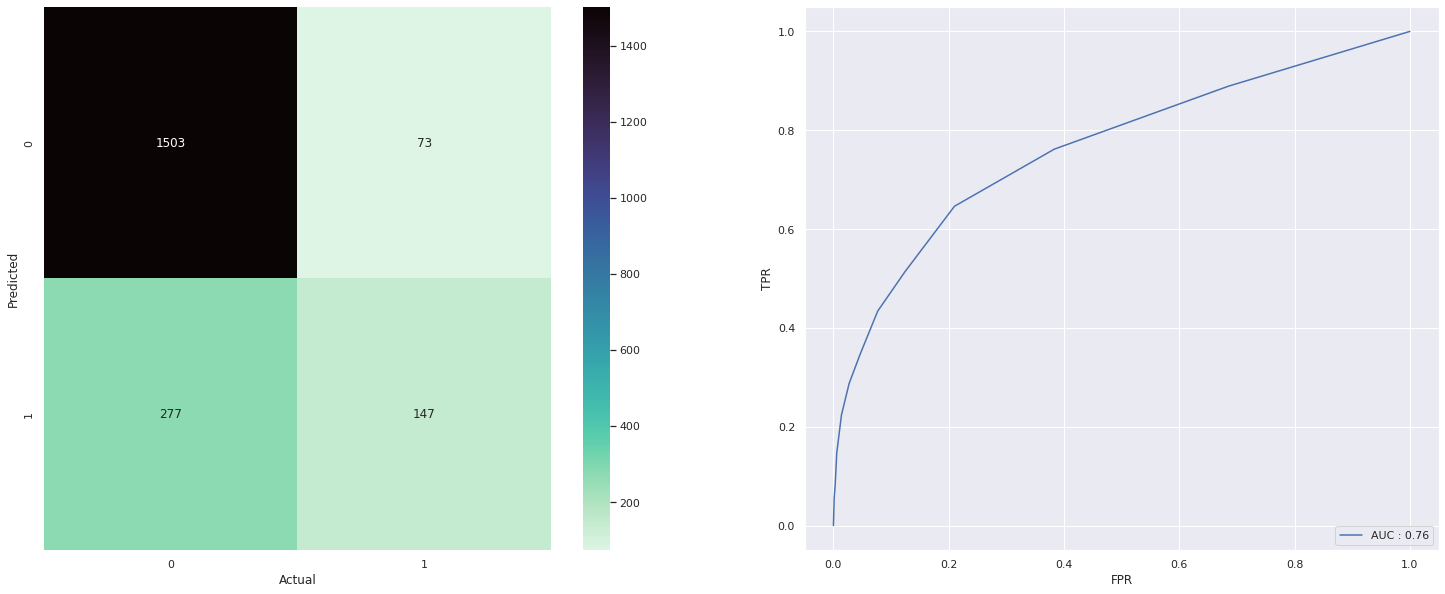

In [25]:
fig , ax = plt.subplots(1,2,figsize=(25,10))

y_pred_knn = grid_knn.best_estimator_.predict(X_test)
y_prob_knn = grid_knn.best_estimator_.predict_proba(X_test)
y_prob_knn = y_prob_knn[:,1]

fpr_knn , tpr_knn , threshold_knn = metrics.roc_curve(y_test , y_prob_knn)
roc_knn = pd.DataFrame({'FPR' : fpr_knn , 'TPR' : tpr_knn})
auc_knn = metrics.auc(fpr_knn , tpr_knn)
cm = metrics.confusion_matrix(y_test , y_pred_knn)

sns.heatmap(cm , annot=True , cmap='mako_r' , fmt='d' , ax=ax[0])
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')

sns.lineplot(data=roc_knn , x='FPR' , y='TPR' , ax=ax[1] , label=f'AUC : {auc_knn:.2f}')
plt.legend(loc='lower right')

### `Metrics`

In [26]:
print(f'Accuracy : {metrics.accuracy_score(y_test , y_pred_knn)}')
print(f'F1_Score : {metrics.f1_score(y_test , y_pred_knn)}')
print(f'Precision : {np.sqrt(metrics.precision_score(y_test , y_pred_knn))}')
print(f'Recall : {metrics.recall_score(y_test , y_pred_knn)}')

Accuracy : 0.825
F1_Score : 0.45652173913043487
Precision : 0.8174238913695991
Recall : 0.3466981132075472


## ` XGBoost Classification`

In [27]:
xgbc = xgb.XGBClassifier(
    max_depth=7,
    subsample=0.75,
    colsample_bytree=1,
)

params = [{'n_estimators' : [100,200,300] , 'learning_rate' : [0.04,0.06,0.08,0.1] , 'gamma' : [0.0,0.1,0.2]}]

grid_xgbc = GridSearchCV(estimator=xgbc , param_grid=params , scoring='accuracy' , cv=10 , n_jobs=-1)
grid_xgbc.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=XGBClassifier(max_depth=7, subsample=0.75),
             n_jobs=-1,
             param_grid=[{'gamma': [0.0, 0.1, 0.2],
                          'learning_rate': [0.04, 0.06, 0.08, 0.1],
                          'n_estimators': [100, 200, 300]}],
             scoring='accuracy')

In [28]:
print(f'Best_score : {grid_xgbc.best_score_}')
print(f'Best_parameter : {grid_xgbc.best_params_}')

Best_score : 0.834875
Best_parameter : {'gamma': 0.0, 'learning_rate': 0.04, 'n_estimators': 100}


### ` Evaluation`

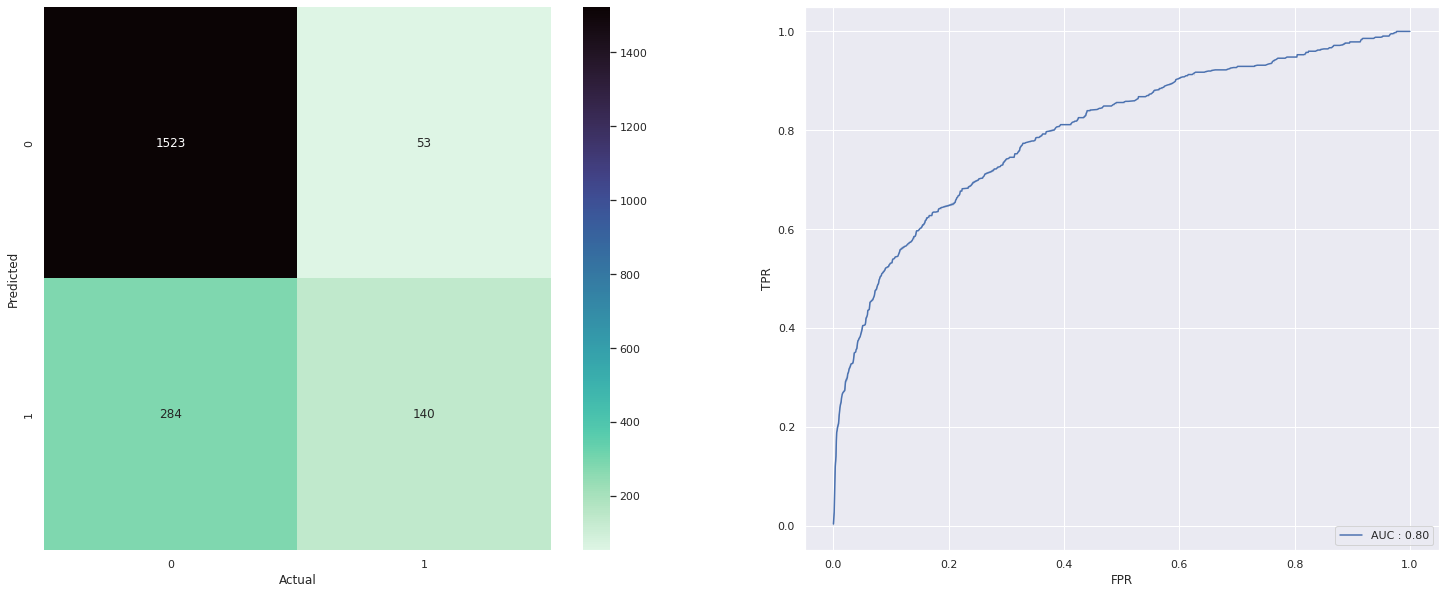

In [29]:
fig , ax = plt.subplots(1,2,figsize=(25,10))

y_pred_xgbc = grid_xgbc.best_estimator_.predict(X_test)
y_prob_xgbc = grid_xgbc.best_estimator_.predict_proba(X_test)
y_prob_xgbc = y_prob_xgbc[:,1]

fpr_xgbc , tpr_xgbc , threshold_xgbc = metrics.roc_curve(y_test , y_prob_xgbc)
roc_xgbc = pd.DataFrame({'FPR' : fpr_xgbc , 'TPR' : tpr_xgbc})
auc_xgbc = metrics.auc(fpr_xgbc , tpr_xgbc)
cm = metrics.confusion_matrix(y_test , y_pred_xgbc)

sns.heatmap(cm , annot=True , cmap='mako_r' , fmt='d' , ax=ax[0])
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')

sns.lineplot(data=roc_xgbc , x='FPR' , y='TPR' , ax=ax[1] , label=f'AUC : {auc_xgbc:.2f}')
plt.legend(loc='lower right')

### ` Metrics`

In [30]:
print(f'Accuracy : {metrics.accuracy_score(y_test , y_pred_xgbc)}')
print(f'F1_Score : {metrics.f1_score(y_test , y_pred_xgbc)}')
print(f'Precision : {np.sqrt(metrics.precision_score(y_test , y_pred_xgbc))}')
print(f'Recall : {metrics.recall_score(y_test , y_pred_xgbc)}')

Accuracy : 0.8315
F1_Score : 0.45380875202593196
Precision : 0.8516974821122049
Recall : 0.330188679245283


## ` Support Vector Classification`

In [31]:
svc = SVC(probability=True)

params = [{'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}]

grid_svc = GridSearchCV(estimator=svc , param_grid=params , cv=10 , scoring='accuracy' , n_jobs=-1)
grid_svc.fit(X_train , y_train)

print(f'Best_score : {grid_svc.best_score_}')
print(f'Best_parameter : {grid_svc.best_params_}')

Best_score : 0.83375
Best_parameter : {'kernel': 'rbf'}


### ` Evaluation`

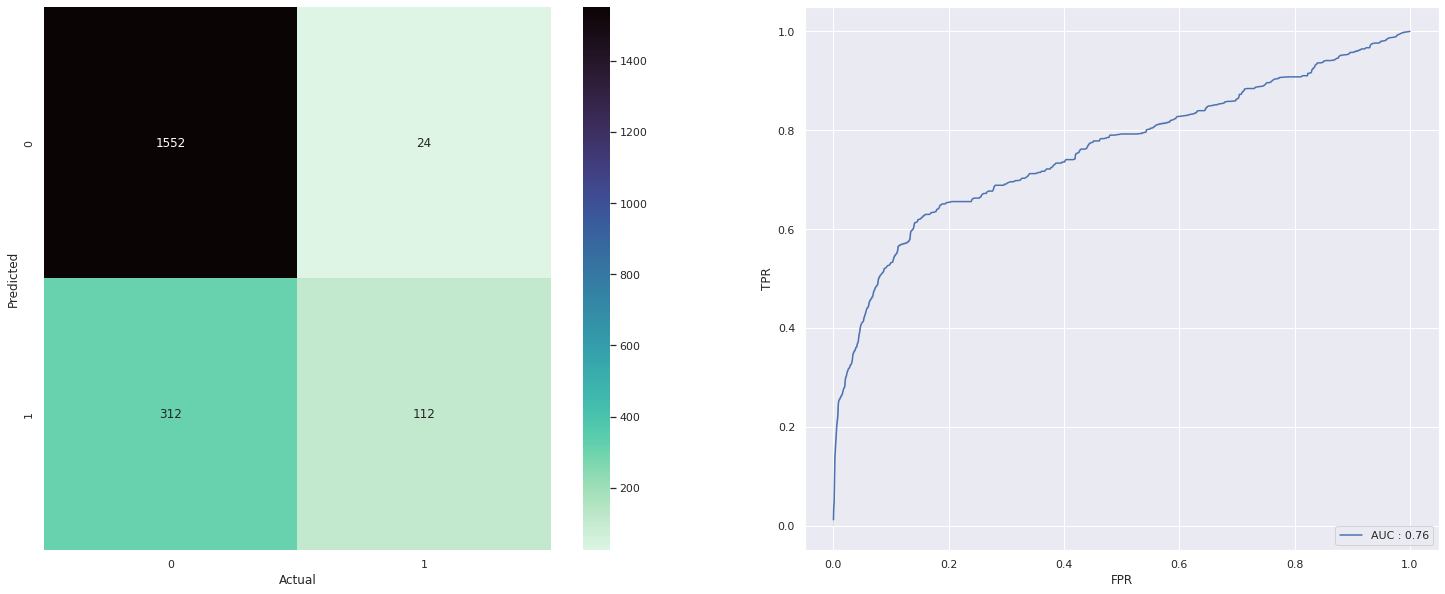

In [32]:
fig , ax = plt.subplots(1,2,figsize=(25,10))

y_pred_svc = grid_svc.best_estimator_.predict(X_test)
y_prob_svc = grid_svc.best_estimator_.predict_proba(X_test)
y_prob_svc = y_prob_svc[:,1]

fpr_svc , tpr_svc , threshold_svc = metrics.roc_curve(y_test , y_prob_svc)
roc_svc = pd.DataFrame({'FPR' : fpr_svc , 'TPR' : tpr_svc})
auc_svc = metrics.auc(fpr_svc , tpr_svc)
cm = metrics.confusion_matrix(y_test , y_pred_svc)

sns.heatmap(cm , annot=True , cmap='mako_r' , fmt='d' , ax=ax[0])
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')

sns.lineplot(data=roc_svc , x='FPR' , y='TPR' , ax=ax[1] , label=f'AUC : {auc_svc:.2f}')
plt.legend(loc='lower right')

### ` Metrics`

In [33]:
print(f'Accuracy : {metrics.accuracy_score(y_test , y_pred_svc)}')
print(f'F1_Score : {metrics.f1_score(y_test , y_pred_svc)}')
print(f'Precision : {np.sqrt(metrics.precision_score(y_test , y_pred_svc))}')
print(f'Recall : {metrics.recall_score(y_test , y_pred_svc)}')

Accuracy : 0.832
F1_Score : 0.4
Precision : 0.9074852129730301
Recall : 0.2641509433962264


## Deep Learning

Now that we created machine learning models and evaluated them, it's time to classifiy this data set with a neural network. Since the dataset is clean the only things we need to do is to create a tf data for our neural networks. Unlike machine learning, though we don't need to extract features as neural networks do that themselves.

## ` Data Preprocessing`

In [86]:
features = churn_data.iloc[: , :-1].values
target =  churn_data.iloc[: , [-1]].values

ct = ColumnTransformer(transformers=[('encoder' , OneHotEncoder() , [1])] , remainder='passthrough')
features = ct.fit_transform(features)

sc = StandardScaler()
features = sc.fit_transform(features)

Here we create a `tf.data` pipeline for our neural network.

In [87]:
churn_dataset = tf.data.Dataset.from_tensor_slices((features , target))
churn_dataset = churn_dataset.shuffle(buffer_size=len(features) , reshuffle_each_iteration=False)

In [88]:
train_length = int((0.8) * len(churn_dataset))

train_set = churn_dataset.take(train_length)
test_set = churn_dataset.skip(train_length)
validation_set = churn_dataset.skip(train_length + int((0.1) * len(churn_dataset)))

train_set = train_set.batch(32)
test_set = test_set.batch(32)
validation_set = validation_set.batch(32)

## ` Model Creation`

In [93]:
model = Sequential()
model.add(Dense(64 , activation='relu' , input_dim=12))
model.add(Dense(128 , activation='relu'))
model.add(Dense(128 , activation='relu'))
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1 , activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                832       
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 33,985
Trainable params: 33,985
Non-trai

In [94]:
model.compile(optimizer='rmsprop' , loss='binary_crossentropy' , metrics=['accuracy'])

## ` Training our Model`

In [ ]:
history = model.fit(
    train_set,
    epochs = 200,
    validation_data = validation_set,
)

## ` Model Performance`

As it can be seen from the plot below our model is probably overfitted. This is actually quite predictable since our dataset doesn't have that many sample, but it also could be because of our imbalance dataset.

In [96]:
loss , acc = model.evaluate(test_set)
print(f'Test Accuracy : {acc:.2f} , Test Loss : {loss:.2f}')

63/63 [==============================] - 0s 1ms/step - loss: 2.2681 - accuracy: 0.8280
Test Accuracy : 0.83 , Test Loss : 2.27


Text(0, 0.5, 'Train vs Validation (Loss)')

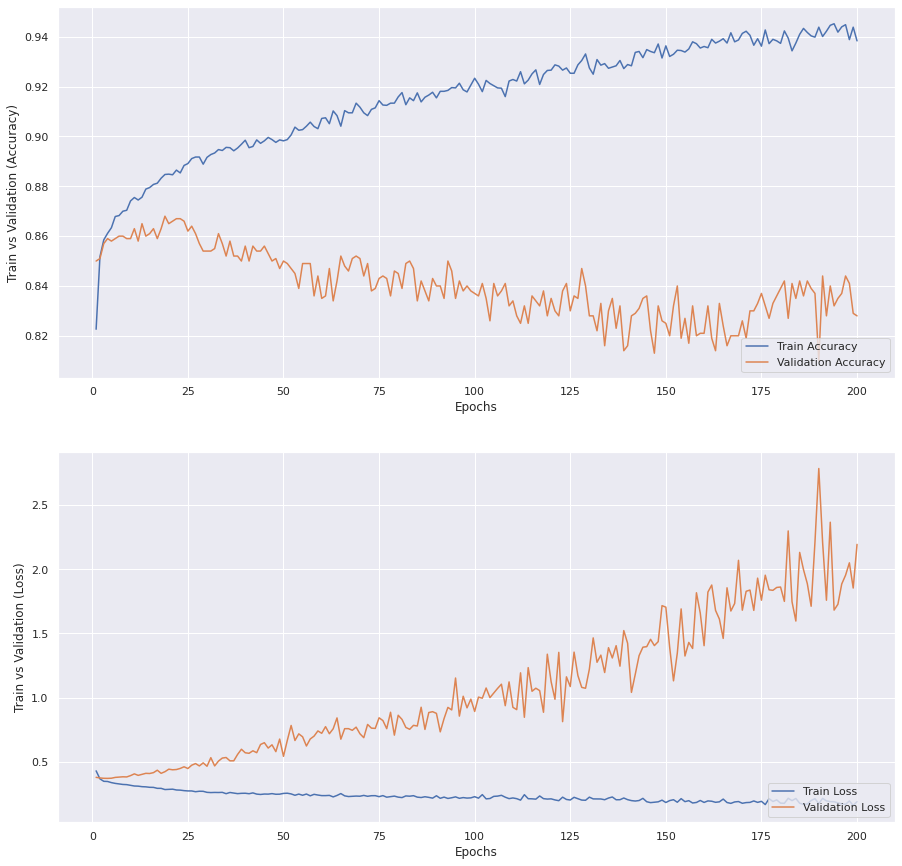

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

model_vis = pd.DataFrame()
model_vis = pd.concat([model_vis , pd.Series(np.array(range(1,201)) , name='Epochs')] , axis=1)
model_vis = pd.concat([model_vis , pd.Series(acc , name='Train Accuracy')] , axis=1)
model_vis = pd.concat([model_vis , pd.Series(val_acc , name='Validation Accuracy')] , axis=1)
model_vis = pd.concat([model_vis , pd.Series(loss , name='Train Loss')] , axis=1)
model_vis = pd.concat([model_vis , pd.Series(val_loss , name='Validation Loss')] , axis=1)

fig , ax = plt.subplots(2 , figsize=(15,15))

sns.lineplot(data=model_vis , x='Epochs' , y='Train Accuracy' , ax=ax[0] , label='Train Accuracy')
sns.lineplot(data=model_vis , x='Epochs' , y='Validation Accuracy' , ax=ax[0] , label='Validation Accuracy')
ax[0].legend(loc='lower right')
ax[0].set_ylabel('Train vs Validation (Accuracy)')

sns.lineplot(data=model_vis , x='Epochs' , y='Train Loss' , ax=ax[1] , label='Train Loss')
sns.lineplot(data=model_vis , x='Epochs' , y='Validation Loss' , ax=ax[1] , label='Validation Loss')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('Train vs Validation (Loss)')

## ` Evaluation`

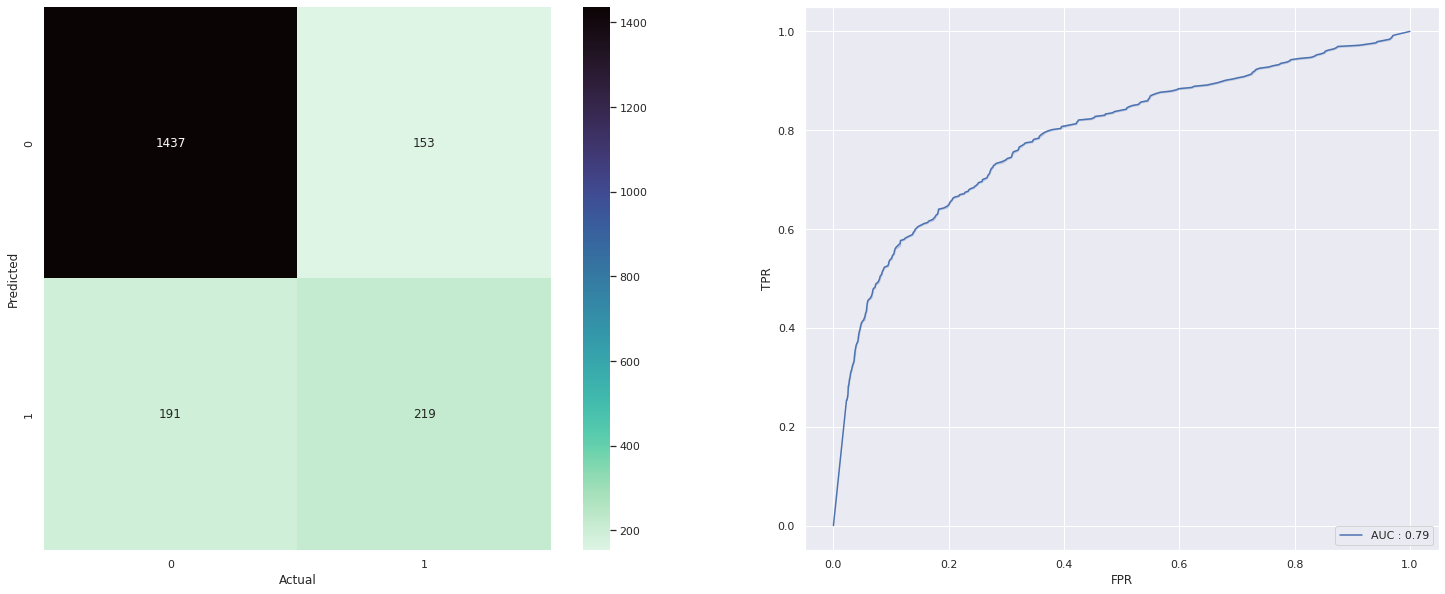

In [98]:
fig , ax = plt.subplots(1,2,figsize=(25,10))

y_prob = model.predict(test_set)
y_pred = (y_prob > 0.5).astype("int32")
y_test_tf = np.concatenate([y for x,y in test_set] , axis=0)

fpr , tpr , threshold = metrics.roc_curve(y_test_tf , y_prob)
roc = pd.DataFrame({'FPR' : fpr , 'TPR' : tpr})
auc = metrics.auc(fpr , tpr)


cm = metrics.confusion_matrix(y_test_tf , y_pred)

sns.heatmap(cm , annot=True , cmap='mako_r' , fmt='d' , ax=ax[0])
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')

sns.lineplot(data=roc , x='FPR' , y='TPR' , ax=ax[1] , label=f'AUC : {auc:.2f}')
plt.legend(loc='lower right')

## ` Metrics`

In [99]:
print(f'Accuracy : {metrics.accuracy_score(y_test_tf , y_pred)}')
print(f'F1_Score : {metrics.f1_score(y_test_tf , y_pred)}')
print(f'Precision : {np.sqrt(metrics.precision_score(y_test_tf , y_pred))}')
print(f'Recall : {metrics.recall_score(y_test_tf , y_pred)}')

Accuracy : 0.828
F1_Score : 0.5601023017902813
Precision : 0.7672741865978255
Recall : 0.5341463414634147


## Thank you for reading through this notebook